<center>
<p><img src="https://mcd.unison.mx/wp-content/themes/awaken/img/logo_mcd.png" width="150">
</p>



<h1>Curso Ingeniería de Características</h1>

<h3>Uso de Geopandas</h3>


<p> Julio Waissman Vilanova </p>



<a target="_blank" href="https://colab.research.google.com/github/mcd-unison/ing-caract/blob/main/ejemplos/mapas/python/geopandas.ipynb"><img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;"  width="30" /> Ejecuta en Colab</a>

</center>

**Esta libreta es una copia textual de [esta libreta en html](https://centrogeo.github.io/curso-geoinformatica-2/02_geovisualizacion/02_geovisualizacion.html) de un [muy buen material de curso de geoinformática](https://centrogeo.github.io/curso-geoinformatica-2/) del [Centro Geo](https://github.com/CentroGeo).**

# Geovisualización

## Manejando objetos geográficos con GeoPandas

Nota: Para instalar las dependencias en Colab, copien las siguientes líneas en una celda y ejecútenla.

In [ ]:
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal
# Install rtree - Geopandas requirment
!apt install python3-rtree
# Install descartes - Geopandas requirment
!pip install descartes
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git

# Install tools to use in notebook
!pip install mapclassify
!pip install palettable
!pip install contextily

In [56]:
import matplotlib.pyplot as plt
import geopandas as gpd
import palettable as pltt
from seaborn import palplot
import requests

En esta práctica, aprenderemos a importar, manipular y visualizar datos espaciales. Hasta cierto punto, los datos espaciales han sido tan propagados que existen casos en los que únicamente se consideran como "una columna más" dentro de una tabla; sin embargo, existen múltiples características que distinguen enormemente a los datos geográficos de las tablas numéricas comúnes.

En esta sesión, vamos a construir a partir de las habilidades desarolladas en la práctica de Transformación de Datos, para combinarlas y, en el proceso, descubrir que, salvo algunas particularidades, tratar con datos espaciales en Python se asemeja mucho al manejo de datos no espaciales.

Para esto, se utilizarán los datos derivados del Censo de Población y Vivienda 2010 de INEGI, así como la geografía utilizada para su construcción, lo cual puede ser consultado a través de [este link](http://gaia.inegi.org.mx/scince2/viewer.html), y descargado por [este otro](https://www.inegi.org.mx/app/descarga/?ti=13&ag=00).

Para trabajar este taller en Colab, podemos bajar los datos de la siguiente forma:

In [57]:
url = "https://www.dropbox.com/s/fkyz9a36dlxgaoa/agebs_cdmx.geojson?dl=1"
r = requests.get(url, allow_redirects=True)
open('/content/agebs_cdmx.geojson', 'wb').write(r.content)

url = "https://www.dropbox.com/s/fs1n5um80n2gtme/vias_cuauhtemoc.geojson?dl=1"
r = requests.get(url, allow_redirects=True)
open('/content/vias_cuauhtemoc.geojson', 'wb').write(r.content)

url = "https://www.dropbox.com/s/fs1n5um80n2gtme/cuauhtemoc.geojson?dl=1"
r = requests.get(url, allow_redirects=True)
open('/content/cuauhtemoc.geojson', 'wb').write(r.content)

url = "https://www.dropbox.com/s/fs1n5um80n2gtme/agebs_cuauhtemoc.geojson?dl=1"
r = requests.get(url, allow_redirects=True)
open('/content/agebs_cuauhtemoc.geojson', 'wb').write(r.content)

url = "https://www.dropbox.com/s/h82435z8lcn97g3/estaciones_metro.zip?dl=1"
r = requests.get(url, allow_redirects=True)
open('/content/estaciones_metro.zip', 'wb').write(r.content)

url = "https://www.dropbox.com/s/rfx4t2989y834lm/poblacion_cdmx.csv?dl=1"
r = requests.get(url, allow_redirects=True)
open('/content/poblacion_cdmx.csv', 'wb').write(r.content)

# Carpeta de datos
f = "/content/"

## Importando Datos Espaciales

La forma más fácil y rápida de importar datos espaciales es a través de un objeto del tipo `GeoDataFrame`, que tiene la capacidad de interpretar cuáles son las columnas donde se almacena la componente espacial, ausente en un DataFrame convencional; además, se puede visualizar rápidamente a través del comando `.plot()`.

La librería principal utilizada para el manejo de datos espaciales recibe el nombre de geopandas, la cual es una extensión geoespacial de la librería pandas con la que se ha trabajado hasta ahora. geopandas ofrece exactamente la misma funcionalidad de pandas, debido a que la primera fue construída a partir de la segunda, añadiendo un conjunto de funciones de caracter espacial que permiten que la manipulación y transformación de los datos espaciales sea tan sencilla como con los datos no espaciales.

En sólo dos líneas de código es posible obtener una representación gráfica de los datos espaciales contenidos en un archivo, siendo posible manejar una gran variedad de formatos; de hecho, debido a que ambos manejan el mismo tipo de drivers, la gran mayoría de los archivos vectoriales que son aceptados en QGIS pueden ser aceptados por geopandas. Comenzaremos por graficar una capa a la vez de forma tosca pero veloz, para poco a poco agregar estilo y sofisticación.

### Polígonos

Comenzando por uno de los tipos de datos espaciales más comunes, Polígonos, se importará la geografía de todas las AGEB's que conforman la Ciudad de México, a través de la funcion .read_file() de geopandas; asimismo, se utilizará el método .set_index() para determinar su Clave Geográfica (CVEGEO) como el índice de cada fila:

In [58]:
# Importar los datos espaciales
agebs = gpd.read_file(f + 'agebs_cdmx.geojson')

# Seleccionar su Clave Geográfica como el índice de las filas
agebs = agebs.set_index('ageb_urbana_cvegeo')

La variable agebs contiene un objeto del tipo `GeoDataFrame`, el cual es muy similar a los `DataFrame`, pero con una nueva columna llamada `geometry`:

In [59]:
agebs.head()

geometry
ageb_urbana_cvegeo                                                   
0900700013628       MULTIPOLYGON (((-99.03887 19.39128, -99.03851 ...
0900300011533       MULTIPOLYGON (((-99.1801 19.30772, -99.17845 1...
0901500010235       MULTIPOLYGON (((-99.14495 19.45625, -99.14536 ...
0900200010097       MULTIPOLYGON (((-99.20573 19.50454, -99.2063 1...
0900200011184       MULTIPOLYGON (((-99.20723 19.50387, -99.20652 ...

Como tal, es posible graficar rápidamente este GeoDataFrame a través de la instrucción `.plot()`:

<Axes: >

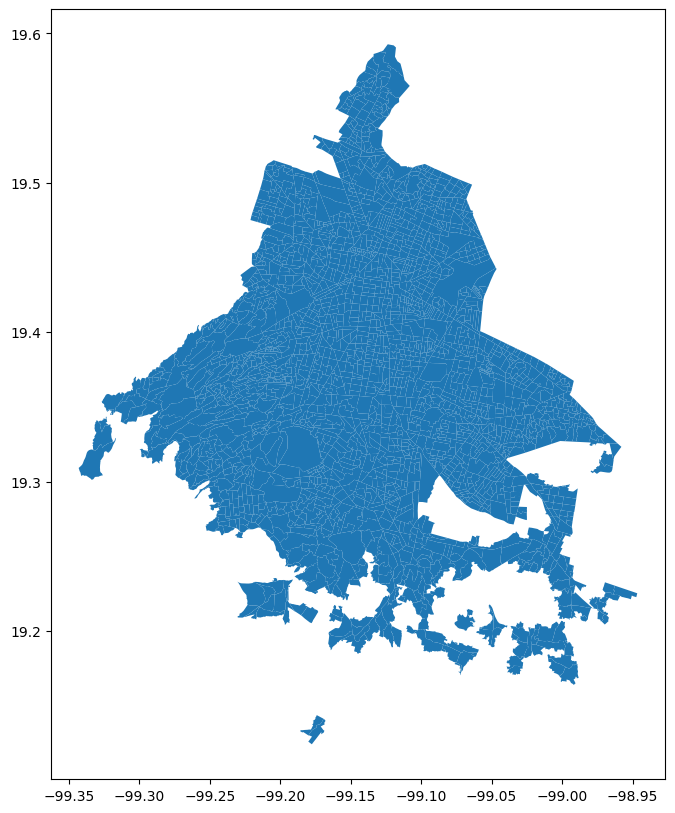

In [81]:
agebs.plot(figsize = (10,10))

Aunque no se trata de la visualización estética de las AGEB's, si permite visualizar rápidamente la apariencia de éstas; más adelante se aprenderá cómo mejorar la apariencia visual y personalizar estas representaciones.

### Líneas

Visualizar líneas es tan sencillo y directo como lo es con los polígonos. En este caso, se importarán todas las vialidades de la Alcaldía Cuauhtémoc:

In [61]:
# Se importan los datos espaciales
vias = gpd.read_file(f + 'vias_cuauhtemoc.geojson')

# Se establece una columna como índice
vias = vias.set_index('id')

# Visualizar los primeros registros de la fila
vias.head()

geometry
id                                                   
1   LINESTRING (-99.17041 19.40092, -99.17047 19.4...
2   LINESTRING (-99.1785 19.4072, -99.17868 19.40718)
3   LINESTRING (-99.14905 19.43796, -99.14871 19.4...
4   LINESTRING (-99.14735 19.44531, -99.14718 19.4...
5   LINESTRING (-99.17655 19.42105, -99.17645 19.4...

Al igual que con los polígonos, es posible utilizar la función `.plot()` para graficar las líneas rápidamente:

<Axes: >

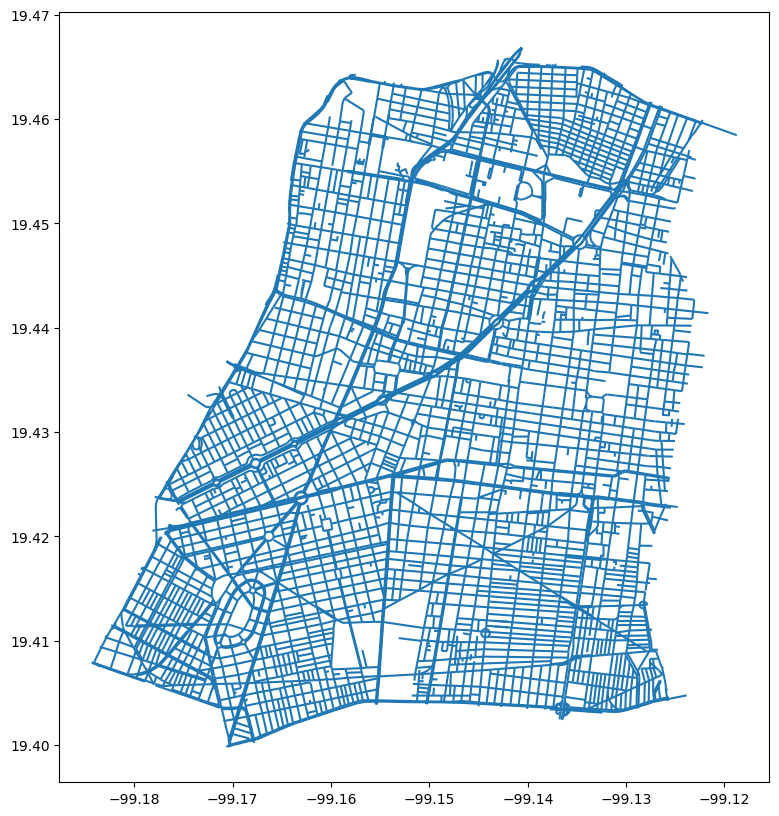

In [62]:
vias.plot(figsize=(10,10))

Y de igual forma, puede obtenerse una sola línea a través la función `.loc()`, su índice y la columna `geometry`:

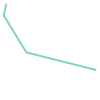

In [63]:
vias.loc[9079, 'geometry']

Al igual que con los polígonos, ésta no es la mejor visualización de las líneas, y probablemente se buscará cambiar algunos parámetros como colores, ancho, entre otros; sin embargo, es la forma más veloz en la que puede visualizarse la apariencia de los datos espaciales.

### Puntos

Nuevamente, los puntos siguen una estructura similar; en este caso, se trabajarán con las Estaciones del Metro de la Ciudad de México:

In [64]:
estaciones = gpd.read_file(f + 'estaciones_metro.zip')
estaciones.head()

stop_lat   stop_lon                          geopoint agency_id   stop_id  \
0  19.443082 -99.139034          (2:19.443082,-99.139034)     METRO   14169.0   
1  19.468965 -99.136176  (2:19.468965,-99.13617600000001)     METRO   14103.0   
2  19.376256 -99.187746      (2:19.37625563,-99.18774605)     METRO   14079.0   
3  19.408944 -99.122279      (2:19.40894369,-99.12227869)     METRO   14144.0   
4  19.375679 -99.186866      (2:19.37567873,-99.18686628)     METRO  132131.0   

                                     stop_desc    stop_name  \
0   Metro Línea 8 correspondencia con línea B.  Garibaldi_1   
1   Metro Línea 5 correspondencia con línea 3.  La Raza_1_3   
2  Metro Línea 7 correspondencia con línea 12.    Mixcoac_1   
3   Metro Línea 9 correspondencia con línea 4.      Jamaica   
4  Metro Línea 12 correspondencia con línea 7.      Mixcoac   

                         trip_heads                        geometry  
0  Garibaldi - Constitución de 1917  POINT (485405.843 2149860.572)  
1           Pantitlán - Politécnico   POINT (485708.11 2152724.378)  
2                 Tláhuac - Mixcoac  POINT (480284.558 2142470.874)  
3              Tacubaya - Pantitlán  POINT (487161.939 2146081.726)  
4                 Mixcoac - Tláhuac  POINT (480376.875 2142406.938)

Y la visualización se produce de forma idéntica a los casos anteriores:

<Axes: >

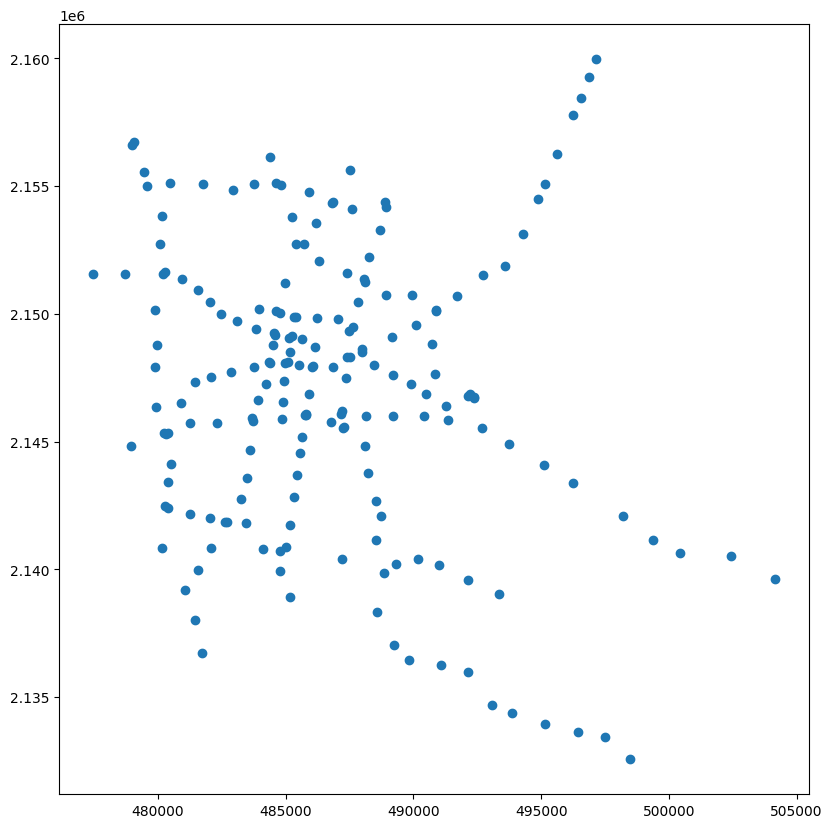

In [65]:
estaciones.plot(figsize=(10,10))

## Estilizando Gráficas

Es posible trabajar con múltiples características de una gráfica para personalizarla y que cumpla con necesidades específicas. En esta sección, se explorarán algunos de estos elementos básicos que permiten obtener mapas mejor representados y más fáciles de comprender.

### Cambio de Transpariencia

La intensidad del color de un polígono puede ser cambiado sencillamente a través del argumento alpha de la función `.plot()`; éste se especifica a través de un valor entre cero y uno, donde el 0 representa transparencia completa y el 1 completa opacidad (máxima intensidad):

<Axes: >

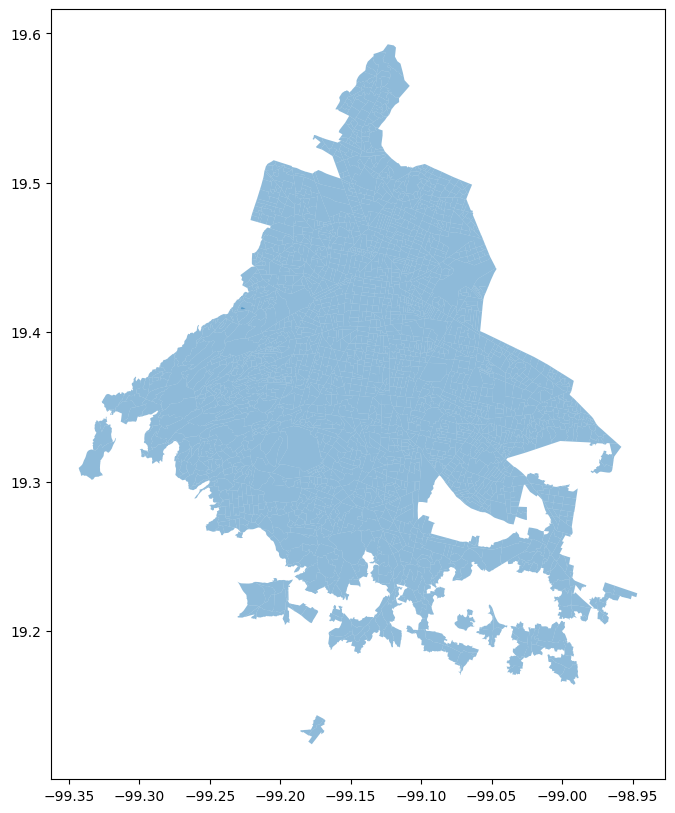

In [66]:
agebs.plot(alpha=0.5 , figsize = (10,10))

### Eliminar Ejes

En algunos casos, los ejes pueden ser de utilidad para entender el contexto de los datos, aunque en algunos otros los mapas se perciben mejor sin ellos. Elimiar los ejes implica envolver a la gráfica en una figura, lo cual conlleva utilizar más líneas de código que, por si mismas, permitirán crear diseños más flexibles y trabajados; éstas requieren el uso directo de la librería `matplotlib.pyplot`, que fue importada en esta práctica bajo el nombre `plt`:

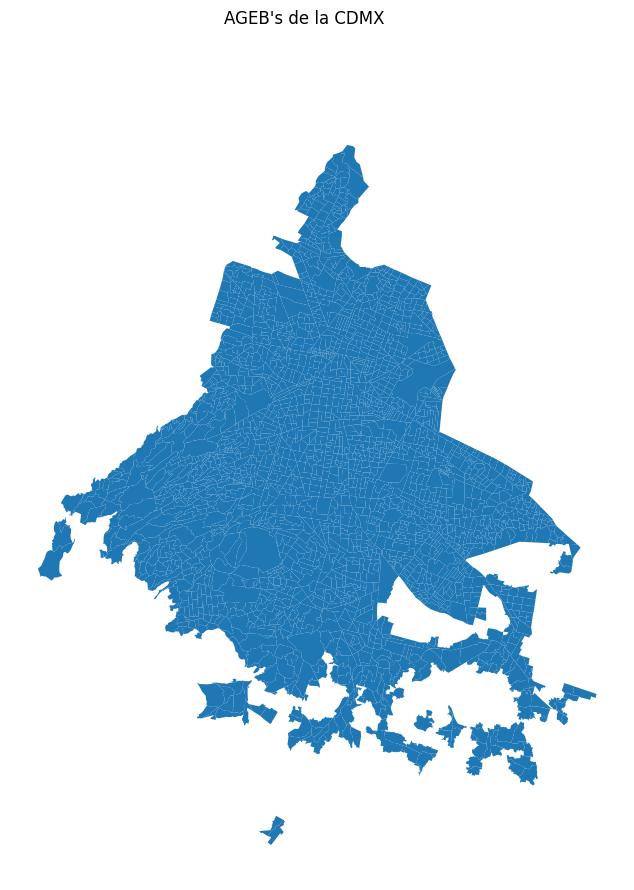

In [67]:
# Preparación de la Figura y sus Ejes, así como el tamaño
fig , fila = plt.subplots(1, figsize=(10,10))

# Grafica la capa de polígonos sobre la fila
agebs.plot(ax = fila)

# A través de la función '.suptitle()' aplicada a la figura se coloca el título.
fig.suptitle("AGEB's de la CDMX")

# Eliminar las ventanas de los ejes
fila.set_axis_off()

plt.show()

### Cambiar el Tamaño del Mapa

Al igual que con ejemplos anteriores, el argumento figsize sigue siendo utilizado para controlar el tamaño de la figura, radicando la diferencia en que el argumento se coloca dentro de la función `.subplots()`. Como se ha hecho hasta ahora, el primer número indica el ancho (Eje X), mientras que el segundo la altura (Eje Y), ambos medidos en pulgadas.

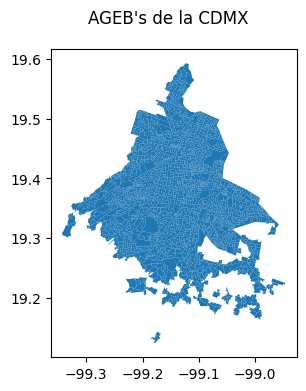

In [68]:
fig , fila = plt.subplots(1, figsize=(4,4))
agebs.plot(ax = fila)
fig.suptitle("AGEB's de la CDMX")
plt.show()

### Modificar Bordes del Polígono

Los bordes de los polígonos pueden dificultar la interpretación de un mapa, por lo que resulta útil el saber cómo pueden ser modificados. Aunque no resulta muy complicado, la forma en la que geopandas accede a los bordes no es muy directa como con otras características del mapa, tales como su tamaño o el marco.

De modo que se entienda con facilidad los pasos a seguir, primero se mostrará el código que permite modificar los bordes de un polígono, para después analizarlo:

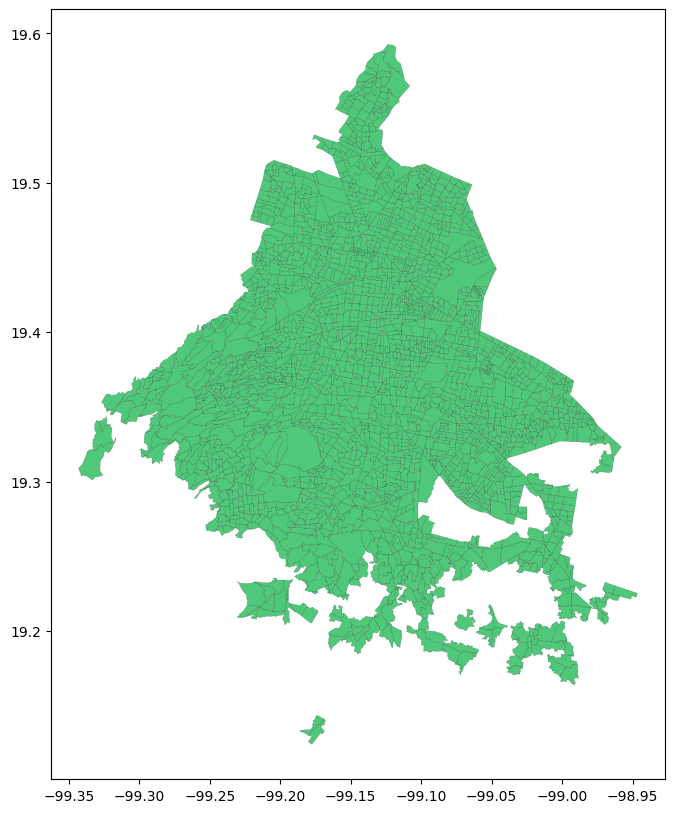

In [69]:
fig , fila = plt.subplots(1, figsize=(10,10))

# En la siguiente línea se modifica el color de los polígonos ('facecolor'),
# del borde ('edgecolor') y su ancho ('linewidth')
agebs.plot(
    linewidth=0.1,
    facecolor='#50C879',
    edgecolor='#000702',
    ax=fila
)
plt.show()

Este método funciona de forma muy similar con otras geometrías, como las líneas; por ejemplo, si se buscara mostrar las vialidades de la práctica de forma distinta, simplemente se modifican los argumentos correspondientes:

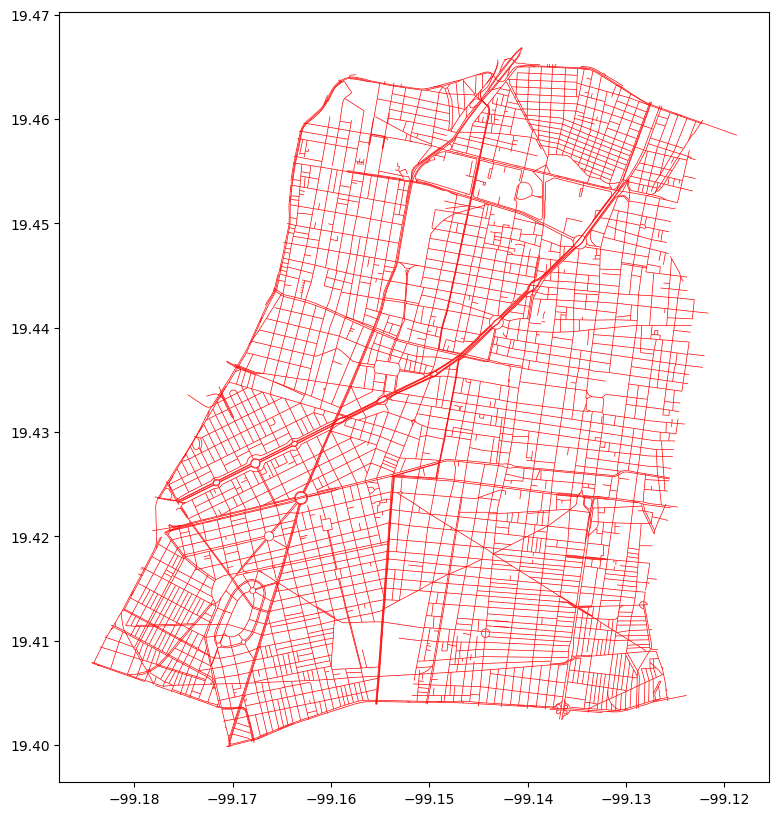

In [70]:
fig , fila = plt.subplots(1, figsize=(10,10))
vias.plot(
    linewidth=0.5,
    color='red',
    ax=fila
)
plt.show()

Es importante destacar que, en el caso de las líneas, únicamente se necesitó modificar el argumento color de la función .plot() ya que, dado el hecho de que las líneas no poseen un área, no existe la necesidad de diferenciar entre el relleno (facecolor) y el contorno (edgecolor).

### Transformar el Sistema de Coordenadas (CRS)

El Sistema de Coordenadas de Referencia (CRS, por sus siglas en inglés), es la forma en que los especialistas en la información espacial pueden representar un objeto tridimensional, como la forma semi-esférica de la Tierra, en un plano bidimensional, como un pedazo de papel o una pantalla.

Si los datos, desde su fuente, poseen información sobre el Sistema de Coordenadas, resulta bastante sencillo modificar éste en un `GeoDataFrame`. Primero, vale la pena verificar que los datos se encuentren proyectados:

In [71]:
agebs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Como puede observarse, la componente `.crs` de un `GeoDataFrame` es la que almacena la información sobre su proyección; en este caso, nos muestra que nuestros datos se encuentran en proyección WGS84, ya que ésta es la que posee el código EPSG 4326, y permite inferir que la unidad de medida son los grados (Latitud y Longitud).

Para reproyectar nuestros datos a un sistema diferente, se requiere conocer el código EPSG del nuevo sistema (el cual puede ser encontrado fácilmente en [buscadores en línea como éste](http://epsg.io/)) para después recurrir a la función `.to_crs()` de geopandas. En nuestro caso, se llevarán los datos a una proyección métrica, WGS84 / UTM Zona 14N (EPSG: 32614):

<Axes: >

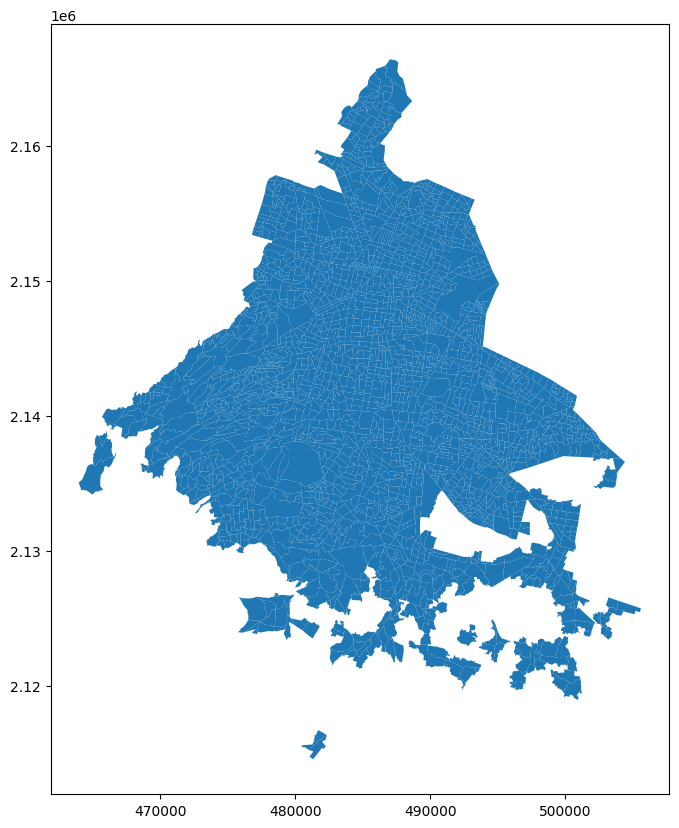

In [72]:
agebs.to_crs(epsg = 32614).plot(figsize = (10,10))

Debido a que el área de trabajo es relativamente pequeña, la forma de los polígonos observados es casi idéntica a la observada en los ejemplos anteriores; sin embargo, la escala utilizada para la gráfica es ahora diferente pues, cuando antes en el Eje Y se tenían valores de entre 19.2° y 19.8°, ahora se tienen de entre 2,120,000m y 2,160,000m, gracias al cambio del Sistema de Coordenadas.

**Ejercicio 1**

Genera un mapa de las AGEB's de la Ciudad de Hermosillo que posea las siguientes características:

- Posea un título
- No muestre los ejes
- Posea un tamaño de 10in x 11in
- Todos los polígonos tengan un relleno del color "#525252" y sean completamente opacos
- Los bordes del polígono tengan un ancho de 0.3 y sean del color "#B9EBE3"

In [109]:
url = 'https://drive.google.com/uc?export=download&id=1GMmYsIR1QUPf-GJw5QeXlFauo4Qv56SN'
r = requests.get(url, allow_redirects=True)
open('/content/hermosillo.geojson', 'wb').write(r.content)
dir = "/content/"

hermosillo = gpd.read_file(dir + 'hermosillo.geojson')
hermosillo.head()

GEOGRAFICO         CVEGEO  CODIGO FECHAACT INSTITUC  \
0  ÁREA GEOESTADÍSTICA BÁSICA  2603000011869    6052  12/2007    INEGI   
1  ÁREA GEOESTADÍSTICA BÁSICA  2603000011746    6052  12/2007    INEGI   
2  ÁREA GEOESTADÍSTICA BÁSICA  2603000012246    6052  12/2007    INEGI   
3  ÁREA GEOESTADÍSTICA BÁSICA  2603000011750    6052  12/2007    INEGI   
4  ÁREA GEOESTADÍSTICA BÁSICA  2603000011799    6052  12/2007    INEGI   

  GEOMETRIA                                           geometry  
0      ÁREA  MULTIPOLYGON (((1628105.47727 1920205.7146, 16...  
1      ÁREA  MULTIPOLYGON (((1628032.92965 1921100.77993, 1...  
2      ÁREA  MULTIPOLYGON (((1623070.21083 1922088.60839, 1...  
3      ÁREA  MULTIPOLYGON (((1628614.96988 1922405.42923, 1...  
4      ÁREA  MULTIPOLYGON (((1626439.62403 1919837.82392, 1...

In [110]:
hermosillo = hermosillo.set_index('CVEGEO')
hermosillo_ageb = hermosillo['geometry']
hermosillo_ageb.head()

CVEGEO
2603000011869    MULTIPOLYGON (((1628105.47727 1920205.7146, 16...
2603000011746    MULTIPOLYGON (((1628032.92965 1921100.77993, 1...
2603000012246    MULTIPOLYGON (((1623070.21083 1922088.60839, 1...
2603000011750    MULTIPOLYGON (((1628614.96988 1922405.42923, 1...
2603000011799    MULTIPOLYGON (((1626439.62403 1919837.82392, 1...
Name: geometry, dtype: geometry

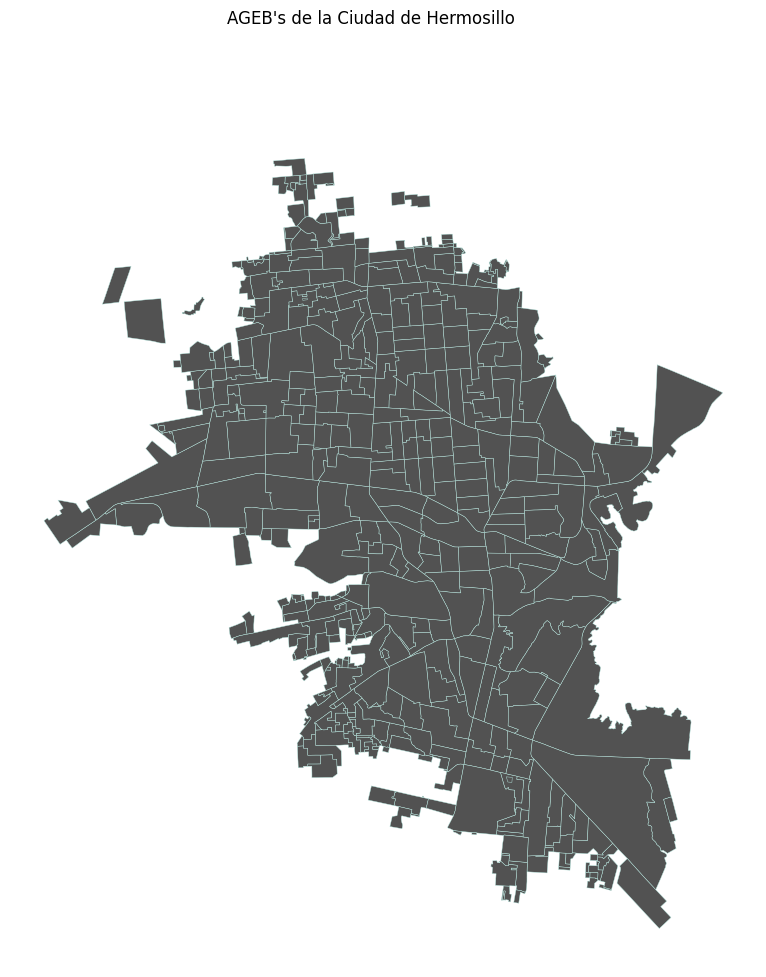

In [117]:
fig , fila = plt.subplots(1, figsize=(10,11))
hermosillo_ageb.plot(
    ax = fila,
    aspect=1,
    facecolor='#525252',
    edgecolor='#B9EBE3',
    alpha=1,
    linewidth=0.3
)
fig.suptitle("AGEB's de la Ciudad de Hermosillo")
fila.set_axis_off()
plt.show()

### Mapas con Múltiples Capas

Hasta ahora, se han estudiado muchas características relacionadas con graficar sólo una capa de información; sin embargo, en muchos casos, un mapa que busque ser lo más comunicativo y eficiente posible buscará combinar múltiples capas. Una de las características más importantes de los Sistemas de Información Geográfica es su capacidad para combinar información espacial proveniente de múltiples fuentes, y sobreponerlos entre sí, lo cual es completamente permitido en Python.

En esencia, combinar diferentes capas de información en un solo mapa implica añadir cada uno en la misma fila de una figura, de forma secuencial, como si se estuviesen solapando una sobre la otra. Por ejemplo, combinando las vialidades de la Alcaldía Cuauhtémoc con el polígono de ésta misma, se tendría:

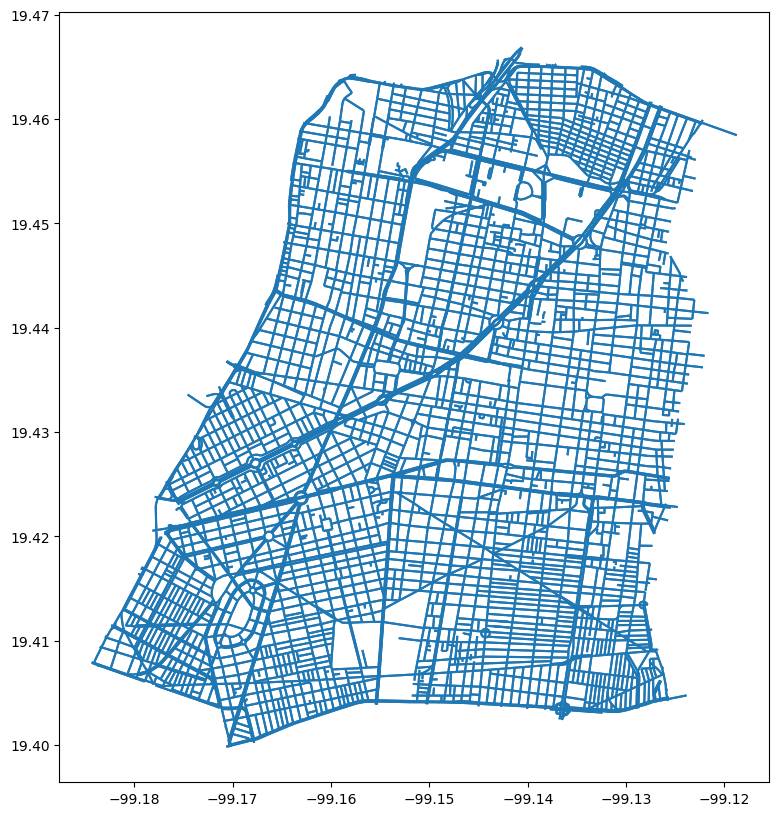

In [118]:
# Primero se necesita importar el polígono de la alcaldía,
# pues no se ha utilizado en ejemplos anteriores
cuauhtemoc = gpd.read_file(f + 'cuauhtemoc.geojson')

# Se establece la figura y su fila con '.subplots()'
fig , filas = plt.subplots(1, figsize = (10,10))

# Se añade primero el polígono base en la fila
cuauhtemoc.plot(ax = filas)

# Y después se colocan las vialidades en la misma fila
vias.plot(ax = filas)

# Por último, y como se ha hecho en ejemplos anteriores, el comando para mostrar el resultado
plt.show()

Debido a que los colores base no fueron diseñados para visualizar múltiples capas en un sólo mapa, resulta imposible diferenciar ambas; sin embargo, los trucos aprendidos durante el manejo de capas individuales resultan de utilidad en este caso, pues pueden ser aplicados de la misma forma:

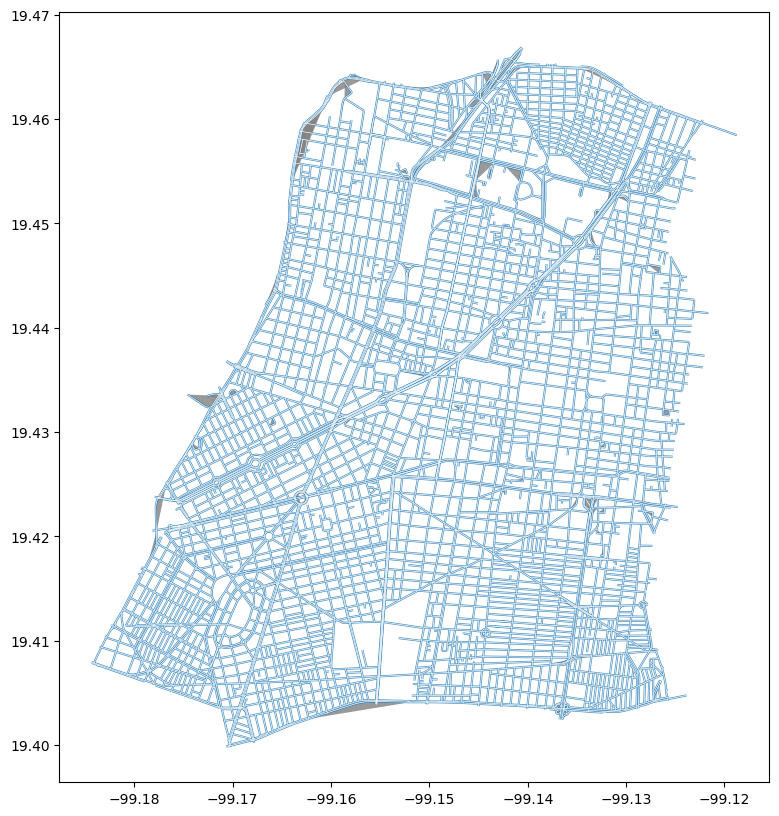

In [119]:
fig , filas = plt.subplots(1, figsize = (10,10))

# Para el polígono, se utilizan los argumentos aplicables al polígono
cuauhtemoc.plot(ax=filas, facecolor='grey', alpha=0.8)

# Y pra las líneas, se utilizan los argumentos usados para las líneas
vias.plot(ax=filas, color = 'white', linewidth =0.5)

plt.show()

### Paletas de Colores

La elección de colores en un mapa puede influir severamente en su apariencia y, a la larga, en su efectividad para comunicar. Aunque en algunos casos elegir estos colores a mano sea suficiente, en algunos otros donde el fin comunicativo se encuentre claramente definido, resulta útil recurrir a paletas de colores predefinidas.

Existen muchas fuentes a través de las cuales es posible obtener paletas de colores, en función del objetivo buscado con el mapa. Para el caso de Python, se tiene a la mano la librería palettable que posee múltiples paletas ya empaquetadas y listas para utilizar dentro del código; asímismo, resulta de utilidad la función palplot(), de la librería seaborn, para examinar los colores rápidamente.

En esta práctica, se utilizará un conjunto de paletas contenidas dentro de la librería palettable provenientes de las películas de Wes Anderson; específicamente, se utilizará una proveniente de la película Viaje a Darjeeling:

![](http://66.media.tumblr.com/2815b755b493555dd4a74fc9f7c84bdb/tumblr_nj7cclt9qb1tvvqeko1_500.jpg)

Primero, es necesario guardar esta paleta dentro de una variable; cabe recordar que palettable se importó bajo el nombre `pltt`:

In [120]:
paleta = pltt.wesanderson.Darjeeling2_5.hex_colors

Para visualizar la apariencia de esta paleta, se recurre a la función palplot() de seaborn:

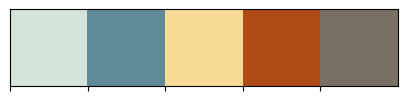

In [121]:
palplot(paleta)

Si se ve la variable por sí misma, podrá notarse que no se trata más que de una lista de colores bajo su Código Hexadecimal:

In [122]:
paleta

['#D5E3D8', '#618A98', '#F9DA95', '#AE4B16', '#787064']

Esta paleta será la que le dará color a nuestro mapa. Como elemento adicional, se colocarán las colonias en las que se subdivide la alcaldía y en donde se han registrado 10 o más homicidios entre los años 2016 a 2018, por lo que primero es necesario importarlas:

In [123]:
agebs_cuau = gpd.read_file(f + 'agebs_cuauhtemoc.geojson')

Para esto, no se utilizará nada más que lo aprendido en secciones anteriores de la práctica, siendo la única diferencia que dentro de los argumentos de color correspondientes se colocará el Código Hexadecimal del color que se pretenda utilizar para esa capa:

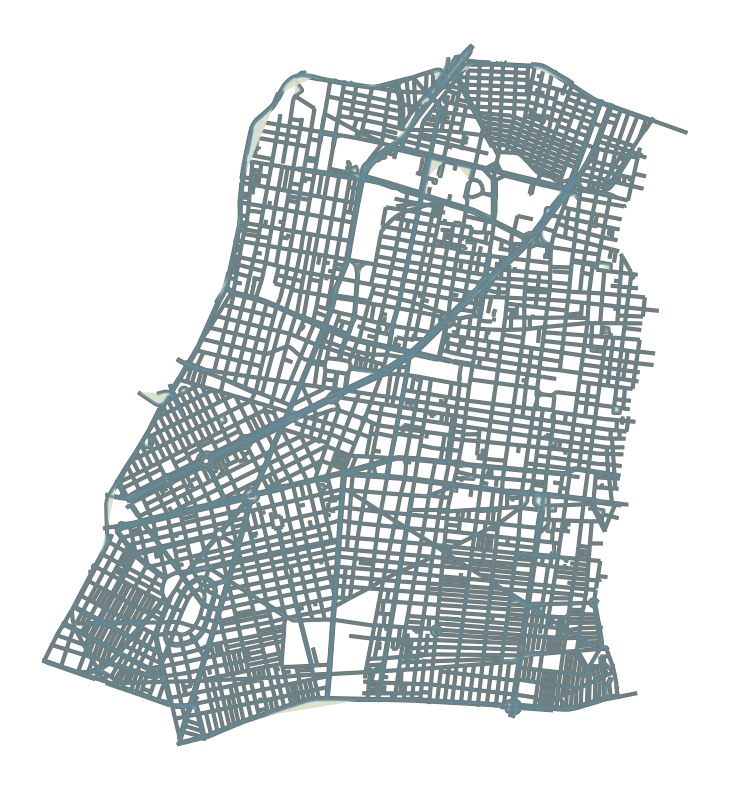

In [124]:
# Se define la figura con sus respectivas filas
fig , filas = plt.subplots(1, figsize=(10,10))

# Se añade el polígono base de la alcaldía
cuauhtemoc.plot(
    ax=filas,
    facecolor='#F9DA95',
    edgecolor='#787064',
    linewidth = 3
)

# Se añaden las vías
vias.plot(
    ax=filas,
    color='#AE4B16',
    linewidth = 0.5
)

# Se aladen las AGEB's con el mayor número de homicidios
agebs_cuau.plot(
    ax=filas,
    facecolor='#D5E3D8',
    edgecolor='#618A98',
    linewidth=2,
    alpha=0.8
)

# Se remueve el marco con los ejes de la fila
filas.set_axis_off()

plt.show()

## Exportar Mapas

Una vez producido el mapa final, puede que se busque el exportar la imagen de modo que pueda ser colocada en un reporte, artículo, sitio web, etc. Para exportar mapas en Python, basta con sustituir la función `plt.show()` por `plt.savefig()` al final de las líneas de código para especificar el dónde y cómo guardarla. Por ejemplo, para guardar el mapa anterior en un archivo de tipo `.png` en la carpeta data, donde se encuentra toda la información con la que se ha trabajado hasta ahora, simplemente basta con:

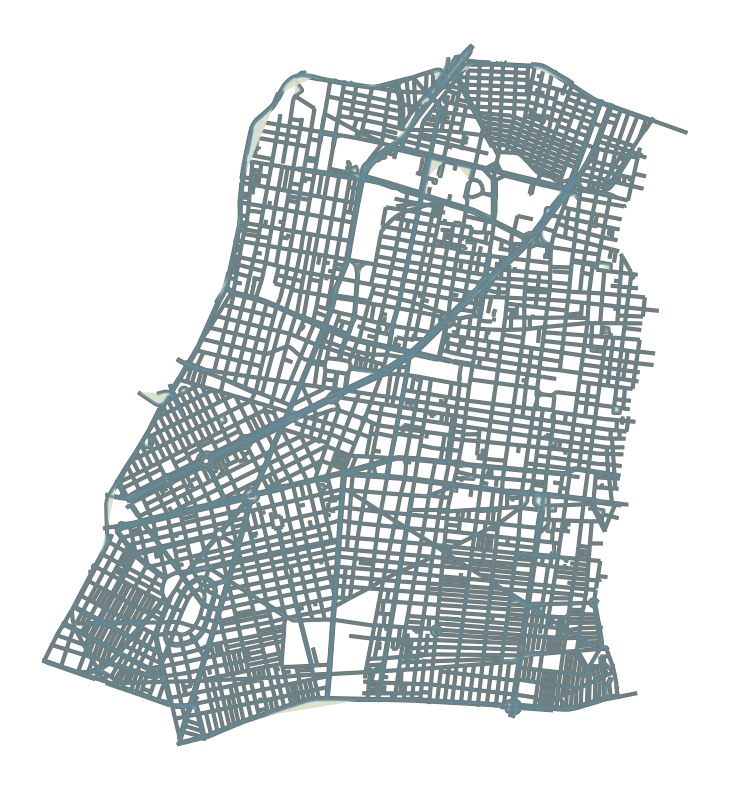

In [125]:
# Se define la figura con sus respectivas filas
fig , filas = plt.subplots(1, figsize=(10,10))

# Se añade el polígono base de la alcaldía
cuauhtemoc.plot(
    ax=filas, facecolor='#F9DA95', edgecolor='#787064', linewidth=3
)
# Se añaden las vías
vias.plot(
    ax=filas, color='#AE4B16', linewidth=0.5
)
# Se aladen las AGEB's con el mayor número de homicidios
agebs_cuau.plot(
    ax=filas, facecolor='#D5E3D8', edgecolor='#618A98', linewidth=2, alpha=0.8
)
# Se remueve el marco con los ejes de la fila
filas.set_axis_off()

# Se guarda el mapa como un archivo PNG en la carpeta 'data/'
plt.savefig('mapa_final.png')

Si se revisa la carpeta, se encontrará la imagen `.png` con el mapa.

La función `plt.savefig()`, de la librería `matplotlib.pyplot` contiene un gran número de parámetros y opciones para trabajar. Dado que el tamaño del mapa generado no es muy grande, es posible incrementar la calidad de éste a través del argumento dpi, o Puntos Por Pulgada (dpi), el cual es una medida estándar de la resolución de las imágenes. Por ejemplo, para obtener una imagen de Alta Definición (HD), se puede cambiar el argumento a 1,080:

Importante - Si el proceso tarda demasiado, cambiar el argumento por 500 también funciona, pues también arrojará una imagen de buena calidad y más fácil de generar.

In [126]:
# Se guarda el mapa como un archivo PNG en la carpeta 'data/'
plt.savefig('mapa_final.png', dpi=1080)

<Figure size 640x480 with 0 Axes>

## Manipulación de Datos Espaciales (`GeoDataFrames`)

Una vez teniendo el conocimiento de cómo visualizar la información espacial, es posible estudiar cómo puede ser combinada con las operaciones aprendidas en sesiones pasadas sobre la manipulación de datos tabulares no espaciales. En esencia, la clave es entender que un `GeoDataFrame` contiene la mayoría de su información espacial en una sola columna llamada geometry, teniendo el resto de la tabla la misma apariencia y comportamiento que un DataFrame no espacial, lo que les concede toda la flexibilidad y conveniencia estudiada en la manipulación, segmentación y transformación de datos tabulares; además de ello, la naturaleza de un `GeoDataFrame` también incorpora un conjunto de operaciones explícitamente espaciales para combinar y transformar los datos. En esta sección, ambos tipos de operaciones serán consideradas.

Primero, vale la pena repasar algunas de las técnicas aprendidas en sesiones pasadas sobre datos no espaciales, y entender cómo pueden ser combinados con el mapeo de sus contrapartes espaciales. Para esto, se utilizarán los datos de población de la CDMX:

In [127]:
import pandas as pd

# Importar la tabla
poblacion = pd.read_csv(f + 'poblacion_cdmx.csv' , index_col = 'ageb_urbana_cvegeo')

# Visualizar la tabla
poblacion.head()

pob_0a2  pob_3a5  pob_6a11  pob_12a14  pob_15a17  \
ageb_urbana_cvegeo                                                     
0900200010010            71       77       235        129        137   
0900200010025           206      241       466        212        261   
090020001003A           157      137       347        202        197   
0900200010044           148      162       391        178        203   
0900200010097            56       82       150         80         88   

                    pob_18a24  pob_25a29  pob_30a49  pob_50a59  pob_60ymas  
ageb_urbana_cvegeo                                                          
0900200010010             298        182       1055        293         822  
0900200010025             622        426       1705        699         974  
090020001003A             478        273       1395        370         902  
0900200010044             459        365       1422        469         993  
0900200010097             202        157        626        248         523

### Unión de Tablas

En la práctica se han importado dos tablas importantes: por una parte, toda la información espacial está contenida en la tabla `agebs`, mientras que los datos tabulares se encuentran contenidos en `poblacion`. Para trabajar con ambos, es necesario conectar las tablas; en idioma de pandas, esto recibe el nombre de `join` (Unión), siendo los elementos claves para la unión los índices de cada tabla, esto es, los nombres asignados a cada fila; esto es lo que se determina utilizando el argumento `index_col` al momento de importar un `.csv`.

Tanto en el caso de `agebs` como de `poblacion`, el índice corresponde a la Clave Geográfica (CVEGEO) de cada una de las AGEB's, lo cual permite ejecutar el join de la siguiente manera:

In [128]:
ageb_pob = agebs.join(poblacion , on = 'ageb_urbana_cvegeo')
ageb_pob.head()

geometry  \
ageb_urbana_cvegeo                                                      
0900700013628       MULTIPOLYGON (((-99.03887 19.39128, -99.03851 ...   
0900300011533       MULTIPOLYGON (((-99.1801 19.30772, -99.17845 1...   
0901500010235       MULTIPOLYGON (((-99.14495 19.45625, -99.14536 ...   
0900200010097       MULTIPOLYGON (((-99.20573 19.50454, -99.2063 1...   
0900200011184       MULTIPOLYGON (((-99.20723 19.50387, -99.20652 ...   

                    pob_0a2  pob_3a5  pob_6a11  pob_12a14  pob_15a17  \
ageb_urbana_cvegeo                                                     
0900700013628            40       45       104         48         49   
0900300011533             0        0         0          0          0   
0901500010235            29       37        87         57         47   
0900200010097            56       82       150         80         88   
0900200011184            38       54        84         50         65   

                    pob_18a24  pob_25a29  pob_30a49  pob_50a59  pob_60ymas  
ageb_urbana_cvegeo                                                          
0900700013628             126         96        345        144         133  
0900300011533               0          0          0          0           0  
0901500010235             152        111        396        178         229  
0900200010097             202        157        626        248         523  
0900200011184             144        112        416        187         239

### Manipulaciones No Espaciales

Una vez unidos los datos espaciales con los no espaciales, pueden utilizarse las técnicas aprendidas en la manipulación y segmentación de tablas no espaciales para crear mapas más complejos. En particular, se utilizarán las funciones requeridas para seleccionar filas basándose en las características de su población, añadiendo la posibilidad de visualizarlas en un mapa.

En primer lugar, puede generarse nuevamente la columna que contiene la Población Total de cada AGEB replicando los comandos ya aprendidos:

In [129]:
ageb_pob['pob_total'] = poblacion.sum(axis = 1)
ageb_pob.head()

geometry  \
ageb_urbana_cvegeo                                                      
0900700013628       MULTIPOLYGON (((-99.03887 19.39128, -99.03851 ...   
0900300011533       MULTIPOLYGON (((-99.1801 19.30772, -99.17845 1...   
0901500010235       MULTIPOLYGON (((-99.14495 19.45625, -99.14536 ...   
0900200010097       MULTIPOLYGON (((-99.20573 19.50454, -99.2063 1...   
0900200011184       MULTIPOLYGON (((-99.20723 19.50387, -99.20652 ...   

                    pob_0a2  pob_3a5  pob_6a11  pob_12a14  pob_15a17  \
ageb_urbana_cvegeo                                                     
0900700013628            40       45       104         48         49   
0900300011533             0        0         0          0          0   
0901500010235            29       37        87         57         47   
0900200010097            56       82       150         80         88   
0900200011184            38       54        84         50         65   

                    pob_18a24  pob_25a29  pob_30a49  pob_50a59  pob_60ymas  \
ageb_urbana_cvegeo                                                           
0900700013628             126         96        345        144         133   
0900300011533               0          0          0          0           0   
0901500010235             152        111        396        178         229   
0900200010097             202        157        626        248         523   
0900200011184             144        112        416        187         239   

                    pob_total  
ageb_urbana_cvegeo             
0900700013628            1130  
0900300011533               0  
0901500010235            1323  
0900200010097            2212  
0900200011184            1389

Posteriormente, se seleccionan las 10 AGEB's con la mayor cantidad de población, a través de la función `.sort_values()` y añadiendo el valor de la selección deseado a `.head()`:

In [130]:
agebs_mas_pobladas = (ageb_pob
    .sort_values('pob_total', ascending = False)
    .head(10)
)

Ahora, puede crearse un mapa de la Ciuda de México y sobreponer como una nueva capa estas áreas:

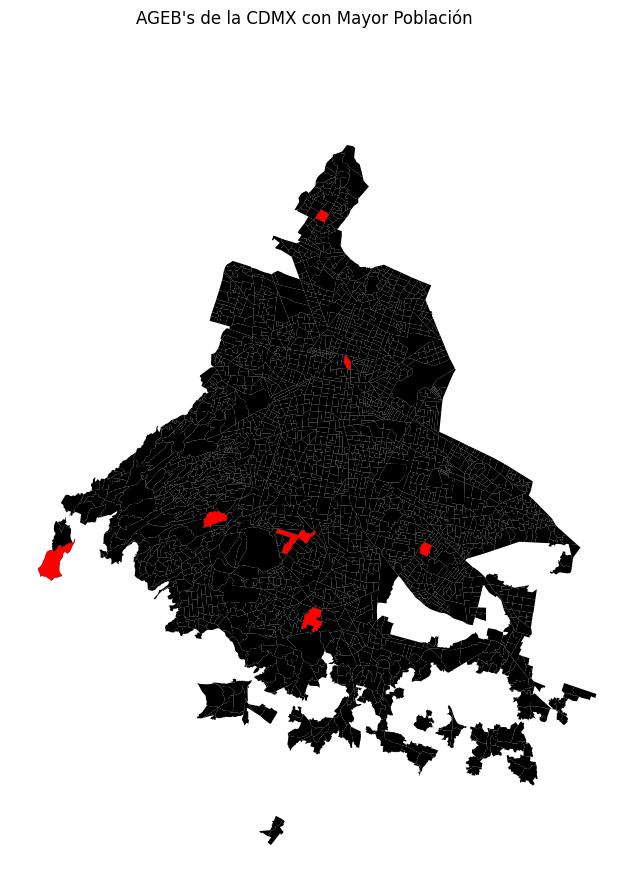

In [131]:
fig, fila = plt.subplots(1, figsize=(10, 10))

# Capa Base de AGEB's
ageb_pob.plot(
    facecolor='black', linewidth=0.025, ax=fila
)

# Capa AGEB's más pobladas
agebs_mas_pobladas.plot(
    alpha=1, facecolor='red', linewidth=0, ax=fila
)

fila.set_axis_off()
fig.suptitle("AGEB's de la CDMX con Mayor Población")

plt.show()

### Manipulaciones Espaciales

Además de las operaciones basadas únicamente en valores, como las realizadas anteriormente, es posible realizar sobre un `GeoDataFrame` una gran variedad de operaciones encontradas en los SIG. A continuación se detallarán algunas de las más comunes

#### Cálculo de Centroides

En algunos casos, resulta útil simplificar un polígono en un sólo punto y, para ello, se calculan los Centroides (siendo algo como el análogo espacial de la media estadística). El siguiente comando dará como resultado un objeto del tipo GeoSeries (una sola columna con datos espaciales) con los Centroides de los polígonos contenidos en un GeoDataFrame:

In [132]:
centroides = ageb_pob.centroid
centroides.head()

<ipython-input-132-82bd11fd909d>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroides = ageb_pob.centroid


ageb_urbana_cvegeo
0900700013628    POINT (-99.03839 19.39066)
0900300011533    POINT (-99.17801 19.30761)
0901500010235    POINT (-99.14579 19.45542)
0900200010097    POINT (-99.20697 19.50685)
0900200011184    POINT (-99.20608 19.50239)
dtype: geometry

Es importante destacar que `centroides` no es una tabla completa, sino una sola columna, esto es, un objeto del tipo `GeoSeries`; esto brinda la posibilidad de graficarlo de forma similar a como se ha hecho anteriormente:

<Axes: >

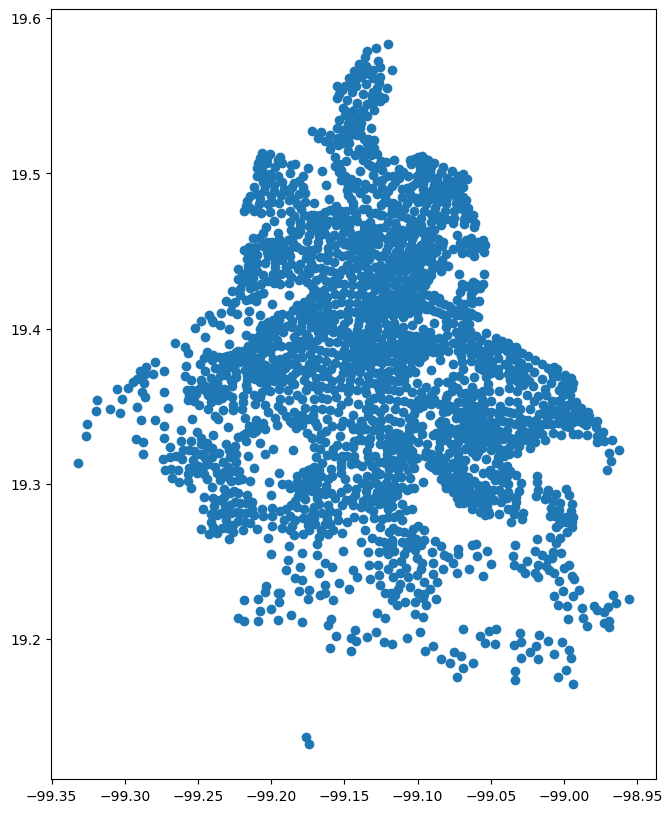

In [133]:
centroides.plot(figsize = (10,10))

En el caso de un objeto del tipo `GeoSeries`, ya no es necesario hacer referencia a la columna `geometry` para inspeccionar su contenido, ya que, al tratarse de una columna de datos espaciales, el objetivo es en sí la geometría.

#### Point-In-Polygon (PiP)

El saber si un punto se encuentra dentro de un polígono es un ejercicio simple desde el punto de vista conceptual; sin embargo, al momento de trasladarlo a la programación, puede tratarse de una acción difícil de completar. La forma más sencilla de realizar esto en GeoPandas es a través del método `.contains()`, disponible para todo polígono.

In [134]:
poligono = ageb_pob['geometry'][0]  # Se aisla el primer polígono dela tabla
punto1 = centroides[0]              # Se aisla el primer punto de la serie
punto2 = centroides[1]              # Se aisla el segundo punto de la serie

/usr/local/lib/python3.10/dist-packages/geopandas/geoseries.py:720: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val = getattr(super(), mtd)(*args, **kwargs)


In [135]:
poligono.contains(punto1)

True

In [136]:
poligono.contains(punto2)

False

El método anterior permite realizar una verificación rápida y cualitativa de si un punto se encuentra dentro de un polígono; sin embargo, en muchos otros casos esto no resulta ser muy eficiente, por lo que se recurre a una operación conocida como *Spatial Join*; éstos serán estudiados más a fondo en futuras prácticas.

#### Buffers

Los Buffers son parte de las operaciones clásicas de un SIG, y consisten en trazar un área alrededor de una geometría en particular, dado un radio específico. Éstos resultan bastate útiles al momento de combinarlos, por ejemplo, con operaciones de *Point-In-Polygon* para calcular valores de accesibilidad, áreas de influencia, entre otros.

Para crear un Buffer a través de GeoPandas, puede utilizarse el método `.buffer()`, al cual se le coloca como argumento el radio deseado. Es importante tomar en cuenta que el radio especificado necesita encontrarse en las mismas unidades que el Sistema de Coordenadas de Referencia (CRS) de la geometría con la que se esté trabajando. Por ejemplo, revisando la capa importada anteriormente de Estaciones del Metro:

In [ ]:
estaciones.crs

La propiedad crs indica que se trata de la proyección con Código EPSG 32614, de la cual, [al investigar sobre ella](http://epsg.io/32614), se tiene que se trata de una proyección que trabaja en metros. Como tal, si se buscara generar un Buffer de 500m alrededor de cada estación, simplemente se tendría que:

In [ ]:
buff = estaciones.buffer(500)
buff.head()

Para representar éstos en un mapa, se recurre a los métodos estudiados anteriormente:

In [ ]:
fig, fila = plt.subplots(1, figsize=(10, 10))

# Graficar los Buffers
buff.plot(ax=fila , alpha=0.5 , facecolor='red', linewidth=0)

# Graficar las Estaciones de Metro sobre las referencias
estaciones.plot(ax=fila , color='green')

plt.show()

**Ejercicio 2**

Genera un mapa de la Ciudad de Hermosillo donde los polígonos de las AGEB's sean de color negro, y sobre ellos y de color amarillo los Buffers a 250m de cada uno de sus centroides.

### Coropletas

Para terminar la práctica de geovisualización vamos a hacer mapas de coropletas usando dos métodos diferentes. Primero vamos a usar directamente GeoPandas para generar los mapas y después vamos a usar `ipyLeaflet` para hacer una visualización interactiva.

Primero, recordemos que ya tenemos los datos de población unidos a las geometrías de las AGEBS

In [ ]:
ageb_pob

Hacer un primer mapa sencillo usando GeoPandas es tan sencillo como pasarle el nombre de la columna que queremos usar para colorear el mapa

In [ ]:
ageb_pob.plot('pob_total', figsize=(10,10), legend=True)

Y cambiar la paleta de colores

In [ ]:
ageb_pob.plot('pob_total', figsize=(10,10), legend=True, cmap='OrRd')

En la documentación de `GeoDataFrame.plot()` pueden ver la lista completa de opciones.

En estos primeros mapas que hemos hecho usamos una escala continua para representar la variable de interés. Otra forma de representar la variación espacial es utilizando un esquema de clasificación discreto sobre nuestra variable de interés, por ejemplo cuantiles, intervalos iguales, etcétera. Para esto, `GeoDtaFrame.plot()` admite pasarle el parámetro `scheme` que toma cualquier esquema de clasificación admitido por [`mapclassify`](https://github.com/pysal/mapclassify).

In [ ]:
ageb_pob.plot(
    'pob_total',
    figsize=(10,10),
    legend=True,
    cmap='OrRd',
    scheme='quantiles'
)

**Ejercicio 3**

Prueben diferentes esquemas de clasificación ([aquí](https://geopandas.org/en/stable/docs/user_guide/mapping.html) pueden encontrar la lista de esquemas disponibles) y discutan sobre qué esquema representa mejor la variación espacial de los datos.

### Mejorando el estilo

Los mapas que hemos hecho son relativamente sencillos, para darles una mejor presentación podemos tomar algunas cosas que ya hemos aprendido, por ejemplo eliminar los ejes y ponerles un título:

In [ ]:
fig , fila = plt.subplots(1, figsize=(10,10))
ageb_pob.plot(
    'pob_total',
    figsize=(10,10),
    legend=True,
    cmap='OrRd',
    scheme='quantiles',
    ax=fila
)
fig.suptitle("Población por AGEB")
fila.set_axis_off()
plt.show()

También es posible agregar un mapa base utilizando la librería [contextily](https://contextily.readthedocs.io/en/latest/)

In [ ]:
import contextily as ctx

In [ ]:
fig , fila = plt.subplots(1, figsize=(10,10))

ageb_pob.plot(
    'pob_total',
    figsize=(10,10),
    legend=True,
    cmap='OrRd',
    scheme='quantiles',
    ax=fila,
    alpha=0.8
)
fig.suptitle("Población por AGEB")
fila.set_axis_off()
ctx.add_basemap(
    fila,
    source=ctx.providers.OpenStreetMap.Mapnik,
    crs=ageb_pob.crs.to_string()
)
plt.show()

**Ejercicio 4**

Prueben usando diferentes mapas base, y cambiando el fondo de la imágen.

### Varios mapas en la misma figura

A veces queremos hacer una imagen que nos permita comparar rápidamente una variable, para eso es conveniente poner juntos dos mapas. Pensemos en este momento en comparar la población por AGEB con la densidad de población por AGEB. Obviamente el primer paso es calcular la densidad de población, para esto vamos a usar la propiedad área de los `GeoDataFrames`. Fíjense como reproyectamos antes de calcular el area para obtener un valor en metros cuadrados

ageb_pob.to_crs(32614).area

In [ ]:
ageb_pob['densidad_pob'] = ageb_pob['pob_total'] / ageb_pob.to_crs(32614).area
ageb_pob.head()

Ahora sí podemos hacer una figura que incluya dos mapas. Hasta ahora siempre hemos usado `fig` , `fila = plt.subplots(1, figsize=(10,10))` para hacer un subplot con una sóla gráfica, lo que vamos a hacer es usarlo ahora para obtener dos ejes en los que graficar.

In [ ]:
# Pedimos subfiguras con un renglón y dos columnas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,12))

# Graficamos en el primer ax
ageb_pob.plot(
    'pob_total',
    legend=True,
    cmap='OrRd',
    scheme='quantiles',
    ax=ax1,
    alpha=0.8
)
# Este título está en el nivel ax, no en el figure
ax1.set_title("Población por AGEB")
ax1.set_axis_off()
ctx.add_basemap(
    ax1,
    source=ctx.providers.OpenStreetMap.Mapnik,
    crs=ageb_pob.crs.to_string()
)


# Graficamos en el segndo ax
ageb_pob.plot(
    'densidad_pob',
    legend=True,
    cmap='OrRd',
    scheme='quantiles',
    ax=ax2,
    alpha=0.8
)
# Este título está en el nivel ax, no en el figure
ax2.set_title("Densidad de Población por AGEB")
ax2.set_axis_off()
ctx.add_basemap(
    ax2,
    source=ctx.providers.OpenStreetMap.Mapnik,
    crs=ageb_pob.crs.to_string()
)
plt.tight_layout() # Para disminuir el espacio entre gráficas

Como pueden ver es relatívamente fácil poner dos gráficas, sólo hay que especificar cómo las queremos organizar y entender que subplots nos va a regresar un array de ejes. Para que quede aún más claro, vamos a hacer ahora cuatro mapas, comparando los porcentajes de poblaión para distintos grupos de edad. Primero vamos a calcular las variables que vamos a mapear:

In [ ]:
ageb_pob['prop_0a2'] = ageb_pob['pob_0a2'] / ageb_pob['pob_total']
ageb_pob['prop_12a14'] = ageb_pob['pob_12a14'] / ageb_pob['pob_total']
ageb_pob['prop_18a24'] = ageb_pob['pob_18a24'] / ageb_pob['pob_total']
ageb_pob['prop_60ymas'] = ageb_pob['pob_60ymas'] / ageb_pob['pob_total']
ageb_pob.head()

Ahora vamos a hacer un layout con cuatro subplots en dos renglones y dos columnas

In [ ]:
# Pedimos subfiguras con un renglón y dos columnas
fig, axes = plt.subplots(2,2, figsize=(24,12))

# aplanamos el array
axes = axes.ravel()

# Graficamos en el primer ax
ageb_pob.plot(
    'prop_0a2',
    legend=True,
    cmap='OrRd',
    scheme='quantiles',
    ax=axes[0],
    alpha=0.8
)
axes[0].set_title("Proporción de 0 a 2")
axes[0].set_axis_off()
ctx.add_basemap(
    axes[0],
    source=ctx.providers.OpenStreetMap.Mapnik,
    crs=ageb_pob.crs.to_string()
)

# Graficamos en el segndo ax
ageb_pob.plot(
    'prop_12a14',
    legend=True,
    cmap='OrRd',
    scheme='quantiles',
    ax=axes[1],
    alpha=0.8
)
axes[1].set_title("Proporción de 12 a 14")
axes[1].set_axis_off()
ctx.add_basemap(
    axes[1],
    source=ctx.providers.OpenStreetMap.Mapnik,
    crs=ageb_pob.crs.to_string()
)

# Graficamos en el tercer ax
ageb_pob.plot(
    'prop_18a24',
    legend=True,
    cmap='OrRd',
    scheme='quantiles',
    ax=axes[2],
    alpha=0.8
)
axes[2].set_title("Proporción de 18 a 24")
axes[2].set_axis_off()
ctx.add_basemap(
    axes[2],
    source=ctx.providers.OpenStreetMap.Mapnik,
    crs=ageb_pob.crs.to_string()
)

# Graficamos en el cuarto ax
ageb_pob.plot(
    'prop_60ymas',
    legend=True,
    cmap='OrRd',
    scheme='quantiles',
    ax=axes[3],
    alpha=0.8
)
axes[3].set_title("Proporción de 60 y más")
axes[3].set_axis_off()
ctx.add_basemap(
    axes[3],
    source=ctx.providers.OpenStreetMap.Mapnik,
    crs=ageb_pob.crs.to_string()
)
plt.tight_layout() # Para disminuir el espacio entre gráficas

plt.show()